In [1]:
from google.colab import files
uploaded = files.upload()

Saving animal_dataset.zip to animal_dataset (1).zip


In [2]:
import zipfile
import os

zip_path = "animal_dataset.zip"
extract_path = "animal_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", os.listdir(extract_path))


Extracted to: ['animal_dataset']


In [6]:
import os

print(os.listdir("animal_dataset"))
print(os.listdir("animal_dataset/animal_dataset"))


['animal_dataset']
['panda', 'dog', 'cat']


In [7]:
base_path = "animal_dataset/animal_dataset"

print("Cat images:", len(os.listdir(base_path + "/cat")))
print("Dog images:", len(os.listdir(base_path + "/dog")))
print("Panda images:", len(os.listdir(base_path + "/panda")))


Cat images: 100
Dog images: 100
Panda images: 100


In [18]:
import numpy as np
from PIL import Image
import glob

classes = ["cat", "dog", "panda"]
data = []
labels = []

for label_idx, cls in enumerate(classes):
    folder = f"{base_path}/{cls}/*"
    for img_path in glob.glob(folder):
        try:
            img = Image.open(img_path).convert("L")
            img = img.resize((32, 32))
            arr = np.array(img).flatten()
            data.append(arr)
            labels.append(label_idx)
        except:
            pass

data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (300, 1024)
Labels shape: (300,)


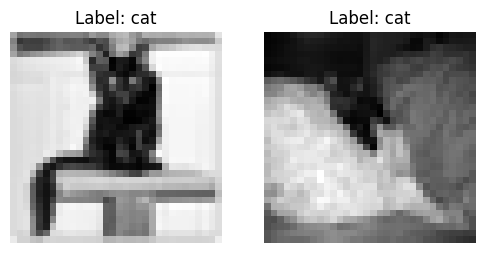

In [19]:
import matplotlib.pyplot as plt

idx1, idx2 = 0, 1

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(data[idx1].reshape(32,32), cmap="gray")
plt.title(f"Label: {classes[labels[idx1]]}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(data[idx2].reshape(32,32), cmap="gray")
plt.title(f"Label: {classes[labels[idx2]]}")
plt.axis("off")

plt.show()


In [20]:
def L2(a, b):
    return np.sqrt(np.sum((a - b)**2))

def L1(a, b):
    return np.sum(np.abs(a - b))


In [21]:
def knn_predict(train_X, train_y, test_x, k, dist_func):
    distances = []

    for i in range(len(train_X)):
        d = dist_func(test_x, train_X[i])
        distances.append((d, train_y[i]))

    distances.sort(key=lambda x: x[0])
    top_k = [label for _, label in distances[:k]]

    return max(set(top_k), key=top_k.count)


In [22]:
def cross_validate(X, y, k_list, dist_func):
    n = len(X)
    fold_size = n // 5

    indices = np.arange(n)
    np.random.shuffle(indices)

    results = {k: [] for k in k_list}

    for fold in range(5):
        start = fold * fold_size
        end = start + fold_size if fold != 4 else n

        val_idx = indices[start:end]
        train_idx = np.concatenate((indices[:start], indices[end:]))

        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        for k in k_list:
            correct = 0
            for i in range(len(X_val)):
                pred = knn_predict(X_train, y_train, X_val[i], k, dist_func)
                if pred == y_val[i]:
                    correct += 1
            acc = correct / len(X_val)
            results[k].append(acc)

    avg = {k: np.mean(results[k]) for k in k_list}
    return avg


In [23]:
k_values = [1, 3, 5, 7, 9, 11]

acc_L1 = cross_validate(data, labels, k_values, L1)
acc_L2 = cross_validate(data, labels, k_values, L2)

print("L1 (Manhattan) Accuracies:", acc_L1)
print("L2 (Euclidean) Accuracies:", acc_L2)


L1 (Manhattan) Accuracies: {1: np.float64(0.4133333333333333), 3: np.float64(0.4166666666666667), 5: np.float64(0.44333333333333325), 7: np.float64(0.42333333333333334), 9: np.float64(0.43000000000000005), 11: np.float64(0.4066666666666666)}
L2 (Euclidean) Accuracies: {1: np.float64(0.36666666666666664), 3: np.float64(0.39333333333333337), 5: np.float64(0.41), 7: np.float64(0.39), 9: np.float64(0.4), 11: np.float64(0.43999999999999995)}


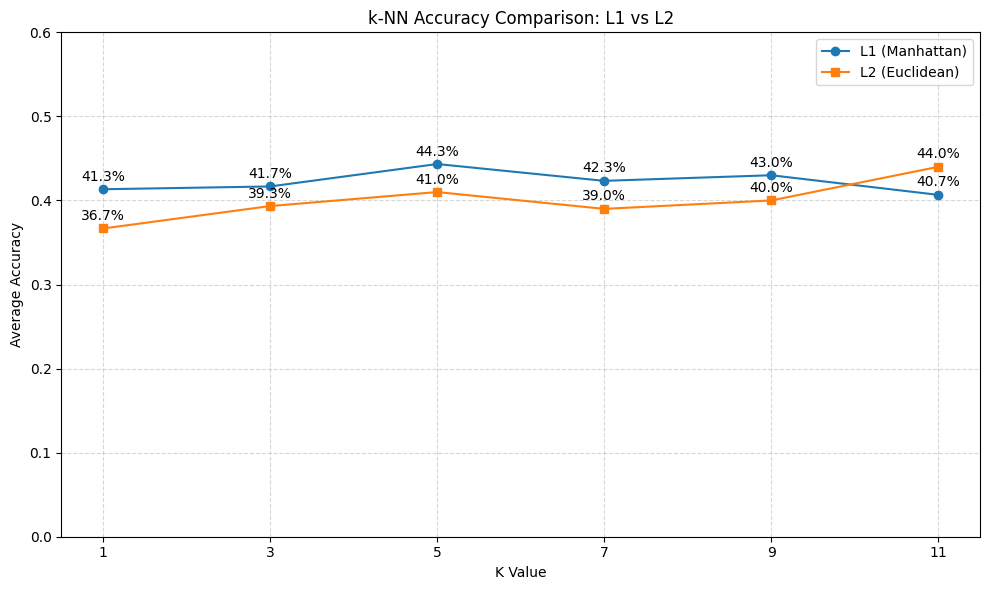

In [37]:
plt.figure(figsize=(10,6))

plt.plot(k_values, [acc_L1[k] for k in k_values], marker="o", label="L1 (Manhattan)")
plt.plot(k_values, [acc_L2[k] for k in k_values], marker="s", label="L2 (Euclidean)")


for k in k_values:
    plt.text(k, acc_L1[k]+0.01, f"{acc_L1[k]*100:.1f}%", ha='center', fontsize=10)
    plt.text(k, acc_L2[k]+0.01, f"{acc_L2[k]*100:.1f}%", ha='center', fontsize=10)

plt.xlabel("K Value")
plt.ylabel("Average Accuracy")
plt.title("k-NN Accuracy Comparison: L1 vs L2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.ylim(0, 0.6)
plt.xticks(k_values)
plt.tight_layout()

plt.show()


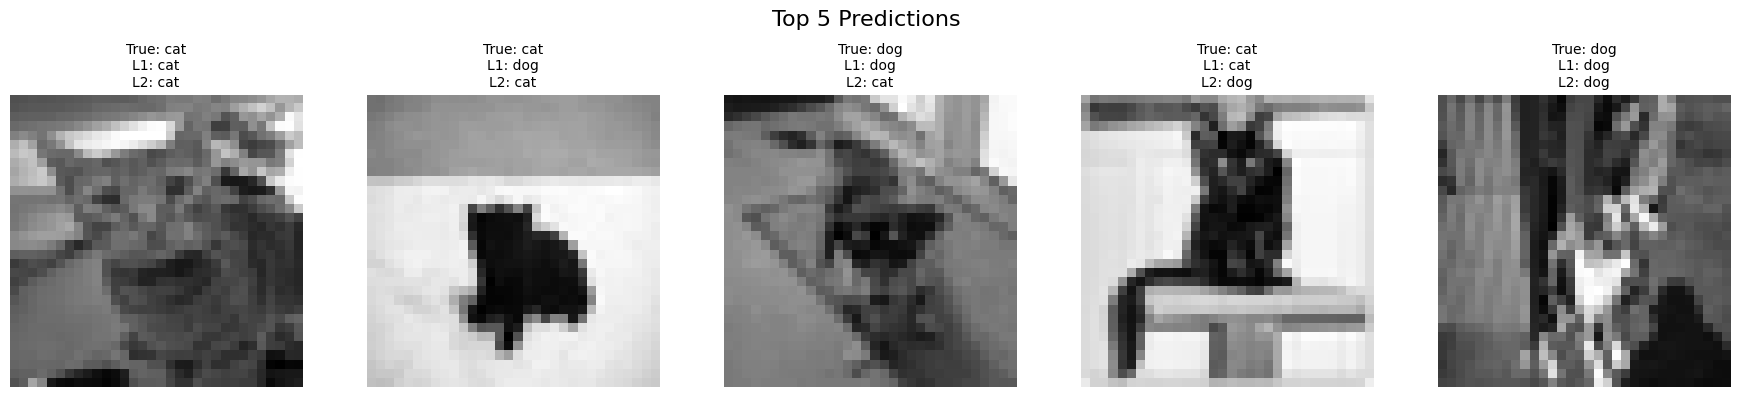

In [40]:
import random

sample_ids = random.sample(range(len(data)), 5)

plt.figure(figsize=(18,4))

for i, idx in enumerate(sample_ids):
    img = data[idx]
    true_label = labels[idx]

    pred_L1 = knn_predict(data, labels, img, k=3, dist_func=L1)
    pred_L2 = knn_predict(data, labels, img, k=3, dist_func=L2)

    plt.subplot(1,5,i+1)
    plt.imshow(img.reshape(32,32), cmap="gray")
    plt.axis("off")
    plt.title(f"True: {classes[true_label]}\nL1: {classes[pred_L1]}\nL2: {classes[pred_L2]}",
              fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.suptitle("Top 5 Predictions ", fontsize=16)
plt.show()
